# First Kaggle Project: Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = sns.load_dataset('titanic')
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
247,1,2,female,24.0,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False
722,0,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
90,0,3,male,29.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
282,0,3,male,16.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
572,1,1,male,36.0,0,0,26.3875,S,First,man,True,E,Southampton,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.shape

(891, 15)

In [81]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1- Gender Analysis

### Survival Rates

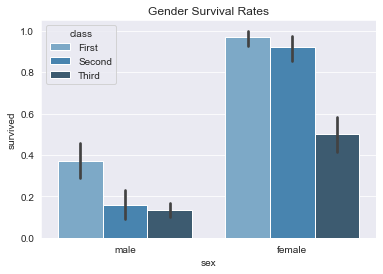

In [9]:
sns.set_style("darkgrid")
sns.set_palette("Blues")
sns.barplot(x = 'sex', y = 'survived', data = df, hue = 'class', palette="Blues_d").set_title('Gender Survival Rates')
plt.show()

In [10]:
dfg = df.groupby('sex')[['survived']].sum()
dfg

,survived
sex,
female,233
male,109


In [11]:
dfg['total'] = df.groupby('sex')[['survived']].count()
dfg

,survived,total
sex,,
female,233,314
male,109,577


In [12]:
dfg['dead'] = dfg.total - dfg.survived
dfg.drop('total', axis=1, inplace = True)
dfg

,survived,dead
sex,,
female,233,81
male,109,468


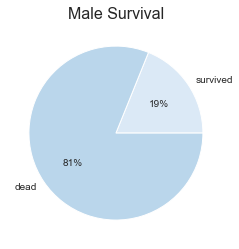

In [13]:
sns.color_palette("Paired")
plt.pie(dfg.iloc[1], labels = dfg.columns, autopct = '%0.0f%%')
plt.title('Male Survival', fontsize = 16)
plt.show()

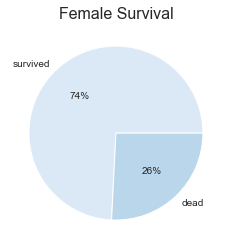

In [14]:
plt.pie(dfg.iloc[0], labels = dfg.columns, autopct = '%0.0f%%')
plt.title('Female Survival', fontsize = 16)
plt.show()

## 2 - Age Analysis

In [46]:
df.age.mean()

29.69911764705882

In [47]:
df.age.median()

28.0

In [50]:
df.groupby('survived').age.mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

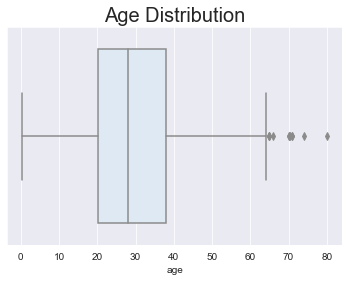

In [55]:
sns.boxplot(x = df['age'])
plt.title('Age Distribution', fontsize = 20)
plt.show()

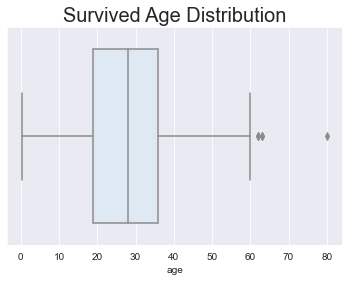

In [59]:
sns.boxplot(x = df[df['survived'] == 1].age)
plt.title('Survived Age Distribution', fontsize = 20)
plt.show()

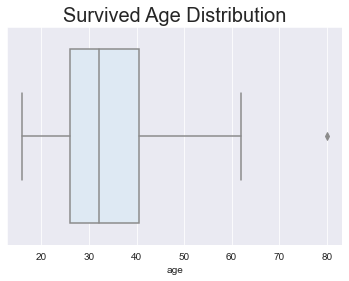

In [62]:
sns.boxplot(x = df[(df['survived'] == 1) & (df['adult_male'] == True)].age)
plt.title('Survived Adult Male Age Distribution', fontsize = 20)
plt.show()

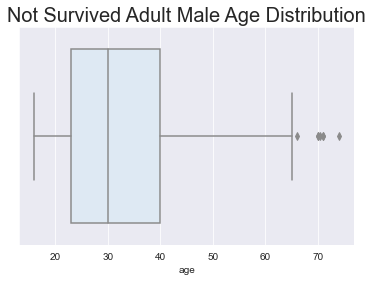

In [63]:
sns.boxplot(x = df[(df['survived'] == 0) & (df['adult_male'] == True)].age)
plt.title('Not Survived Adult Male Age Distribution', fontsize = 20)
plt.show()

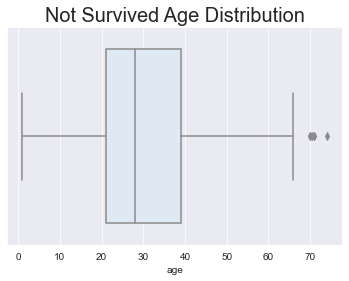

In [60]:
sns.boxplot(x = df[df['survived'] == 0].age)
plt.title('Not Survived Age Distribution', fontsize = 20)
plt.show()

### Does Age Matter for Survival? 

In [90]:
# Average survival rate for Males Above Median Age
df[(df['age'] > df.age.quantile(0.50)) & (df['sex'] == 'male')].survived.mean()

0.19480519480519481

In [91]:
# Average survival rate for Males Below Median Age
df[(df['age'] < df.age.quantile(0.50)) & (df['sex'] == 'male')].survived.mean()

0.22549019607843138

In [92]:
# Average survival rate for Females Above Median Age
df[(df['age'] > df.age.quantile(0.50)) & (df['sex'] == 'female')].survived.mean()

0.8016528925619835

In [93]:
# Average survival rate for Females Above Median Age
df[(df['age'] < df.age.quantile(0.50)) & (df['sex'] == 'female')].survived.mean()

0.7142857142857143

## 3- Class Analysis

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


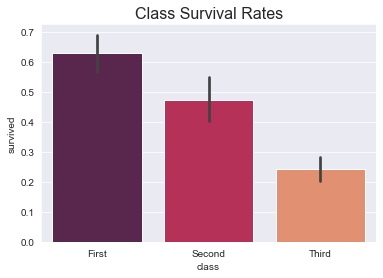

In [102]:
sns.set_palette("Blues")
sns.barplot(x = 'class', y = 'survived', data = df, palette="rocket").set_title('Class Survival Rates', fontsize = 16)
plt.show()

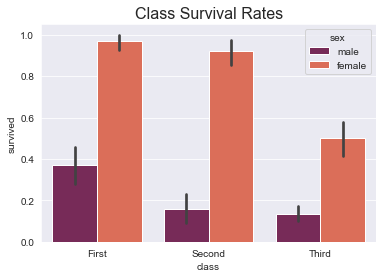

In [103]:
sns.barplot(x = 'class', y = 'survived', hue = 'sex', data = df, palette="rocket").set_title('Class Survival Rates', fontsize = 16)
plt.show()

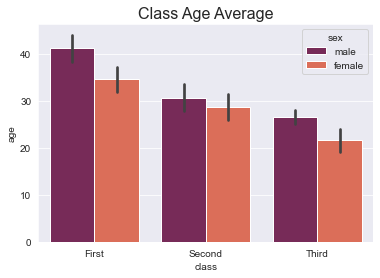

In [101]:
sns.barplot(x = 'class', y = 'age', hue = 'sex', data = df, palette="rocket").set_title('Class Age Average', fontsize = 16)
plt.show()

## 3 - Embark Town Analysis

In [87]:
cla = df.groupby('class')['embark_town'].value_counts()
cla

class   embark_town
First   Southampton    127
        Cherbourg       85
        Queenstown       2
Second  Southampton    164
        Cherbourg       17
        Queenstown       3
Third   Southampton    353
        Queenstown      72
        Cherbourg       66
Name: embark_town, dtype: int64

In [105]:
# Southampton Survival Rate
df[df['embark_town'] == 'Southampton'].survived.mean()

0.33695652173913043

In [108]:
# Southampton Class Average
df[df['embark_town'] == 'Southampton'].pclass.mean()

2.3509316770186337

In [106]:
# Cherbourg Survival Rate
df[df['embark_town'] == 'Cherbourg'].survived.mean()

0.5535714285714286

In [111]:
# Cherbourg Class Average
df[df['embark_town'] == 'Cherbourg'].pclass.mean()

1.8869047619047619

In [107]:
# Queenstown Survival Rate
df[df['embark_town'] == 'Queenstown'].survived.mean()

0.38961038961038963

In [112]:
# Queenstown Class Average
df[df['embark_town'] == 'Queenstown'].pclass.mean()

2.909090909090909

## 4 - Alone and Not Alone

In [40]:
alonef = df[df['sex'] == 'female'][['alone']].value_counts()
alonef

alone
False    188
True     126
dtype: int64

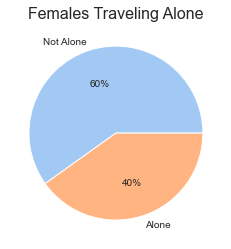

In [123]:
plt.pie(alonef, labels = ['Not Alone', 'Alone'], autopct = '%0.0f%%', colors = sns.color_palette('pastel')[0:5])
plt.title('Females Traveling Alone', fontsize = 16)
plt.show()

In [117]:
df[df['sex'] == 'male'][['alone']].value_counts()

alone
True     411
False    166
dtype: int64

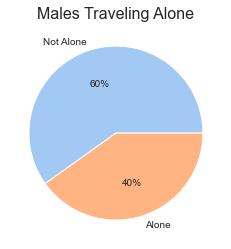

In [124]:
plt.pie(alonef, labels = ['Not Alone', 'Alone'], autopct = '%0.0f%%', colors = sns.color_palette('pastel')[0:5])
plt.title('Males Traveling Alone', fontsize = 16)
plt.show()